# Political Sentiment Analysis on Social Media 

In [2]:
# Importing Libraries
import os
import pandas as pd


## Using the Dataset of Nepali Tweets on 2022 Election 

In [ ]:
# Merging the Labeled Tweets Datasets
labeled_dir = 'labeled'
all_labeled=[]

for file in os.listdir(labeled_dir):
    if file.endswith(".xlsx"):
        df = pd.read_excel(os.path.join(labeled_dir, file))
        df = df[['id', 'text', 'label']].dropna()
        all_labeled.append(df)

labeled_df = pd.concat(all_labeled, ignore_index=True)
labeled_df['id'] = labeled_df['id'].astype(str)


In [ ]:
# Filtering the Main Datasets for labeled Tweets using the column 'id'
main_df = pd.read_excel("nepali_tweets.xlsx")
main_df['id'] = main_df['id'].astype(str)

# Join labeled tweets with full metadata
merged_df = pd.merge(labeled_df, main_df, on='id', how='left')

In [5]:
merged_df.head()

,id,text_x,label,Unnamed: 0,tweet_created_at,text_y,user,bio,location,hashtags,...,statuses_count,coordinates,is_quote_status,retweet_count,retweeted,lang,source,place,kwd,run_date
0,1601363673259290880,@thakurkc @mayor_harka हर्कराज साम्पाङ बालेन श...,2.0,0,2022-12-09 23:50:26+00:00,@thakurkc @mayor_harka हर्कराज साम्पाङ बालेन श...,BirshaNachhiri1,life is not easy do hard work with faithful!,NaN,[],...,894,NaN,False,0,False,ne,Twitter for Android,NaN,जनप्रतिनिधि,2022-12-10 03:39:06
1,1601226348013707008,@KanakManiDixit @Himal_Khabar अब नयाँ जनप्रतिन...,2.0,1,2022-12-09 14:44:45+00:00,@KanakManiDixit @Himal_Khabar अब नयाँ जनप्रतिन...,nirdosh2813,🇳🇵🇳🇵नेपाली हामी रहुला का कहाँ नेपालै न रहे🇳🇵🇳🇵,Nepal janakpur,[],...,10776,NaN,False,0,False,ne,Twitter for Android,NaN,जनप्रतिनिधि,2022-12-10 03:39:06
2,1601225158538117120,@damasebijaya च्याखे थापेर करारका जनप्रतिनिधिन...,2.0,2,2022-12-09 14:40:01+00:00,@damasebijaya च्याखे थापेर करारका जनप्रतिनिधिन...,Trishna50664774,"जागिर खानु छैन तेसैले नो Bio, 99% follow back","ललितपुर, नेपाल",[],...,11834,NaN,False,0,False,ne,Twitter for Android,NaN,जनप्रतिनिधि,2022-12-10 03:39:06
3,1601130318731259904,अहिले सत्तारुढ र एमाले दुवै गठबन्धनका नेताहरू ...,2.0,3,2022-12-09 08:23:10+00:00,अहिले सत्तारुढ र एमाले दुवै गठबन्धनका नेताहरू ...,nepalviewsnv,NaN,Nepal,[],...,26189,NaN,False,0,False,ne,Twitter Web App,NaN,सत्तारुढ,2022-12-10 03:39:06
4,1601069274998504960,सत्तारुढ भारतीय जनता पार्टीको गुजरातमा ऐतिहासि...,3.0,4,2022-12-09 04:20:36+00:00,सत्तारुढ भारतीय जनता पार्टीको गुजरातमा ऐतिहासि...,imagekhabar,Imagekhabar is a multi-platform news and infor...,Nepal,[],...,175220,NaN,False,0,False,ne,TweetDeck,NaN,सत्तारुढ,2022-12-10 03:39:06


In [6]:
merged_df.head()
# Save the merged DataFrame to a new CSV file
merged_df.to_csv('merged_labeled_tweets.csv', index=False)
print("Merged labeled tweets saved to 'merged_labeled_tweets.csv'")

Merged labeled tweets saved to 'merged_labeled_tweets.csv'


Preprocessing the Tweets

In [7]:
%pip install emoji

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [8]:
import emoji
import re


In [9]:
# Loading the stopwords
with open("nepali_stopwords.txt", "r", encoding="utf-8") as f:
    stopwords = set(f.read().splitlines())

# Function to clean the texts

def clean_text(text):
    if pd.isnull(text):
        return ""
    text = emoji.replace_emoji(text, replace="")
    text = re.sub(r"[\u200c\u200d\u200e\u200f\u202a-\u202e]", "", text)
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)
    text = re.sub(r"#\w+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"[a-zA-Z0-9०-९।!\"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~]", "", text)
     # Remove punctuation (both Latin and Devanagari punctuation)
    text = re.sub(r"[।!\"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~]", "", text)
    
    # Remove Latin letters and digits
    text = re.sub(r"[a-zA-Z0-9०-९]", "", text)
    words = text.strip().split()
    words = [w for w in words if w not in stopwords and 2 <= len(w) <= 20]
    return " ".join(words)

merged_df['clean_text'] = merged_df['text_x'].apply(clean_text)

Vocabulary Filtering

-- Filtering the rare and long words

In [10]:
from collections import Counter

word_counts = Counter(" ".join(merged_df["clean_text"]).split())
rare_words = set([w for w, c in word_counts.items() if c < 20])

def filter_rare(text):
    return " ".join([w for w in text.split() if w not in rare_words])

merged_df['final_text'] = merged_df['clean_text'].apply(filter_rare)
merged_df.head()

,id,text_x,label,Unnamed: 0,tweet_created_at,text_y,user,bio,location,hashtags,...,is_quote_status,retweet_count,retweeted,lang,source,place,kwd,run_date,clean_text,final_text
0,1601363673259290880,@thakurkc @mayor_harka हर्कराज साम्पाङ बालेन श...,2.0,0,2022-12-09 23:50:26+00:00,@thakurkc @mayor_harka हर्कराज साम्पाङ बालेन श...,BirshaNachhiri1,life is not easy do hard work with faithful!,NaN,[],...,False,0,False,ne,Twitter for Android,NaN,जनप्रतिनिधि,2022-12-10 03:39:06,हर्कराज साम्पाङ बालेन शाहहरुको दगुरेको गाउँपाल...,साम्पाङ बालेन गाउँपालिका नगरपालिका वडामा जनप्र...
1,1601226348013707008,@KanakManiDixit @Himal_Khabar अब नयाँ जनप्रतिन...,2.0,1,2022-12-09 14:44:45+00:00,@KanakManiDixit @Himal_Khabar अब नयाँ जनप्रतिन...,nirdosh2813,🇳🇵🇳🇵नेपाली हामी रहुला का कहाँ नेपालै न रहे🇳🇵🇳🇵,Nepal janakpur,[],...,False,0,False,ne,Twitter for Android,NaN,जनप्रतिनिधि,2022-12-10 03:39:06,जनप्रतिनिधि सर्वोच्च न्यायाधीश महाभियोग हटाउनु...,जनप्रतिनिधि सर्वोच्च न्यायाधीश महाभियोग पर्छ।
2,1601225158538117120,@damasebijaya च्याखे थापेर करारका जनप्रतिनिधिन...,2.0,2,2022-12-09 14:40:01+00:00,@damasebijaya च्याखे थापेर करारका जनप्रतिनिधिन...,Trishna50664774,"जागिर खानु छैन तेसैले नो Bio, 99% follow back","ललितपुर, नेपाल",[],...,False,0,False,ne,Twitter for Android,NaN,जनप्रतिनिधि,2022-12-10 03:39:06,च्याखे थापेर करारका जनप्रतिनिधिने अत्याचार चाह...,"अत्याचार पास हो, जनप्रतिनिधि झुठो बोलेर पास पद"
3,1601130318731259904,अहिले सत्तारुढ र एमाले दुवै गठबन्धनका नेताहरू ...,2.0,3,2022-12-09 08:23:10+00:00,अहिले सत्तारुढ र एमाले दुवै गठबन्धनका नेताहरू ...,nepalviewsnv,NaN,Nepal,[],...,False,0,False,ne,Twitter Web App,NaN,सत्तारुढ,2022-12-10 03:39:06,सत्तारुढ गठबन्धनका नेताहरू रविलाई सरकारमा नल्य...,सत्तारुढ गठबन्धनका नेताहरू सरकारमा अख्तियार गर...
4,1601069274998504960,सत्तारुढ भारतीय जनता पार्टीको गुजरातमा ऐतिहासि...,3.0,4,2022-12-09 04:20:36+00:00,सत्तारुढ भारतीय जनता पार्टीको गुजरातमा ऐतिहासि...,imagekhabar,Imagekhabar is a multi-platform news and infor...,Nepal,[],...,False,0,False,ne,TweetDeck,NaN,सत्तारुढ,2022-12-10 03:39:06,सत्तारुढ भारतीय जनता पार्टीको गुजरातमा ऐतिहासि...,सत्तारुढ भारतीय जनता पार्टीको ऐतिहासिक जित


In [11]:
# Dropping the duplicates
merged_df = merged_df.drop_duplicates(subset='final_text')

In [12]:
# Annonimizing the Usernames for to remove Personal Identifiable Information (PII)
import hashlib
def hash_username(username):
    if pd.isnull(username):
        return ""
    return hashlib.sha256(username.encode('utf-8')).hexdigest()

merged_df['user'] = merged_df['user'].apply(hash_username)

In [13]:
merged_df.head()

,id,text_x,label,Unnamed: 0,tweet_created_at,text_y,user,bio,location,hashtags,...,is_quote_status,retweet_count,retweeted,lang,source,place,kwd,run_date,clean_text,final_text
0,1601363673259290880,@thakurkc @mayor_harka हर्कराज साम्पाङ बालेन श...,2.0,0,2022-12-09 23:50:26+00:00,@thakurkc @mayor_harka हर्कराज साम्पाङ बालेन श...,939c7de092e923e9e75ae70923f3da8dc9dbf606121bf7...,life is not easy do hard work with faithful!,NaN,[],...,False,0,False,ne,Twitter for Android,NaN,जनप्रतिनिधि,2022-12-10 03:39:06,हर्कराज साम्पाङ बालेन शाहहरुको दगुरेको गाउँपाल...,साम्पाङ बालेन गाउँपालिका नगरपालिका वडामा जनप्र...
1,1601226348013707008,@KanakManiDixit @Himal_Khabar अब नयाँ जनप्रतिन...,2.0,1,2022-12-09 14:44:45+00:00,@KanakManiDixit @Himal_Khabar अब नयाँ जनप्रतिन...,71ddb83740cf9cd2f94937d8af21f834f6e81304ac083e...,🇳🇵🇳🇵नेपाली हामी रहुला का कहाँ नेपालै न रहे🇳🇵🇳🇵,Nepal janakpur,[],...,False,0,False,ne,Twitter for Android,NaN,जनप्रतिनिधि,2022-12-10 03:39:06,जनप्रतिनिधि सर्वोच्च न्यायाधीश महाभियोग हटाउनु...,जनप्रतिनिधि सर्वोच्च न्यायाधीश महाभियोग पर्छ।
2,1601225158538117120,@damasebijaya च्याखे थापेर करारका जनप्रतिनिधिन...,2.0,2,2022-12-09 14:40:01+00:00,@damasebijaya च्याखे थापेर करारका जनप्रतिनिधिन...,6614a78b04284662923d2c2cf9ec10c13c3dca48f2103e...,"जागिर खानु छैन तेसैले नो Bio, 99% follow back","ललितपुर, नेपाल",[],...,False,0,False,ne,Twitter for Android,NaN,जनप्रतिनिधि,2022-12-10 03:39:06,च्याखे थापेर करारका जनप्रतिनिधिने अत्याचार चाह...,"अत्याचार पास हो, जनप्रतिनिधि झुठो बोलेर पास पद"
3,1601130318731259904,अहिले सत्तारुढ र एमाले दुवै गठबन्धनका नेताहरू ...,2.0,3,2022-12-09 08:23:10+00:00,अहिले सत्तारुढ र एमाले दुवै गठबन्धनका नेताहरू ...,52ba518166bbb3d11b6adb5c67e59ff5e5106c2feb1c8d...,NaN,Nepal,[],...,False,0,False,ne,Twitter Web App,NaN,सत्तारुढ,2022-12-10 03:39:06,सत्तारुढ गठबन्धनका नेताहरू रविलाई सरकारमा नल्य...,सत्तारुढ गठबन्धनका नेताहरू सरकारमा अख्तियार गर...
4,1601069274998504960,सत्तारुढ भारतीय जनता पार्टीको गुजरातमा ऐतिहासि...,3.0,4,2022-12-09 04:20:36+00:00,सत्तारुढ भारतीय जनता पार्टीको गुजरातमा ऐतिहासि...,601fcb344dce80db314d8cbed385cc6ddc2e5eb996b419...,Imagekhabar is a multi-platform news and infor...,Nepal,[],...,False,0,False,ne,TweetDeck,NaN,सत्तारुढ,2022-12-10 03:39:06,सत्तारुढ भारतीय जनता पार्टीको गुजरातमा ऐतिहासि...,सत्तारुढ भारतीय जनता पार्टीको ऐतिहासिक जित


In [14]:
merged_df = merged_df[merged_df['label'].isin([0, 1, 2, 3])]

In [15]:
merged_df[['id', 'final_text', 'label']].to_csv("cleaned_labeled_tweets.csv", index=False)

Exploratory Data Analysis

C:\Users\hello\AppData\Local\Temp\ipykernel_28192\291452448.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x="label_name", order=label_map.values(), palette="Set2")


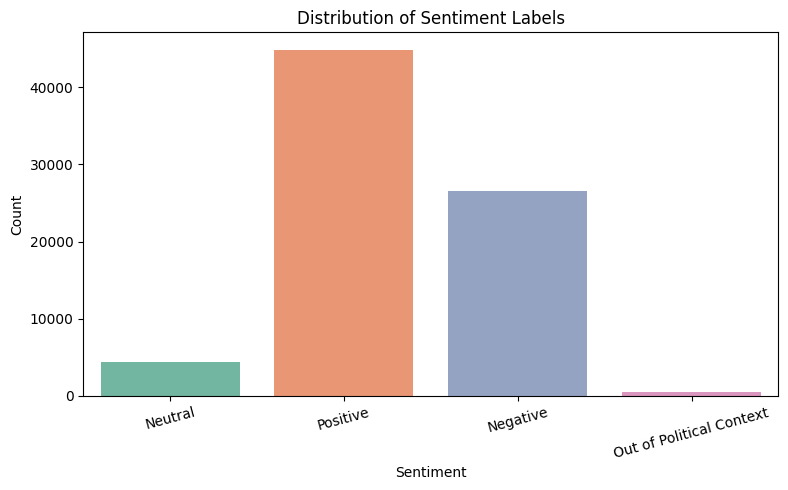

In [16]:
# Label Distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Label map for readability
label_map = {
    0: "Neutral",
    1: "Positive",
    2: "Negative",
    3: "Out of Political Context"
}

merged_df["label_name"] = merged_df["label"].map(label_map)

plt.figure(figsize=(8, 5))
sns.countplot(data=merged_df, x="label_name", order=label_map.values(), palette="Set2")
plt.title("Distribution of Sentiment Labels")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


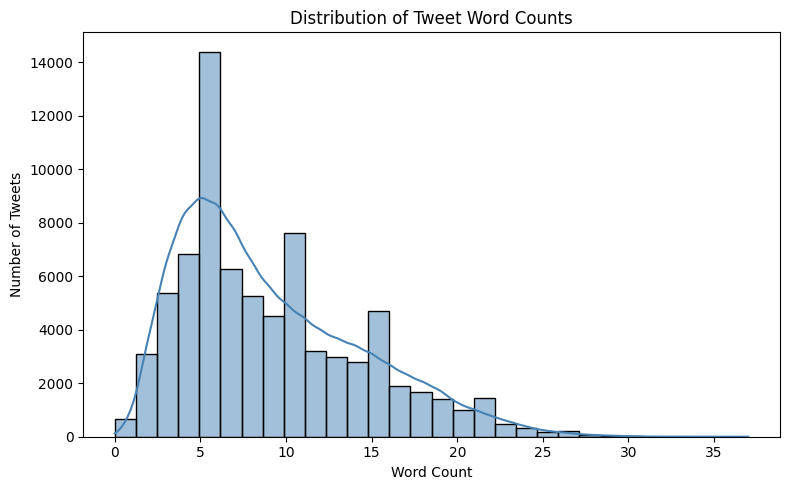

In [17]:
# Tweet Length Distribution

# Adding a length column
merged_df["text_length"] = merged_df["final_text"].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(8, 5))
sns.histplot(data=merged_df, x="text_length", bins=30, kde=True, color="steelblue")
plt.title("Distribution of Tweet Word Counts")
plt.xlabel("Word Count")
plt.ylabel("Number of Tweets")
plt.tight_layout()
plt.show()

C:\Users\hello\AppData\Local\Temp\ipykernel_28192\1036868276.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_lengths.index, y=avg_lengths.values, palette="pastel")


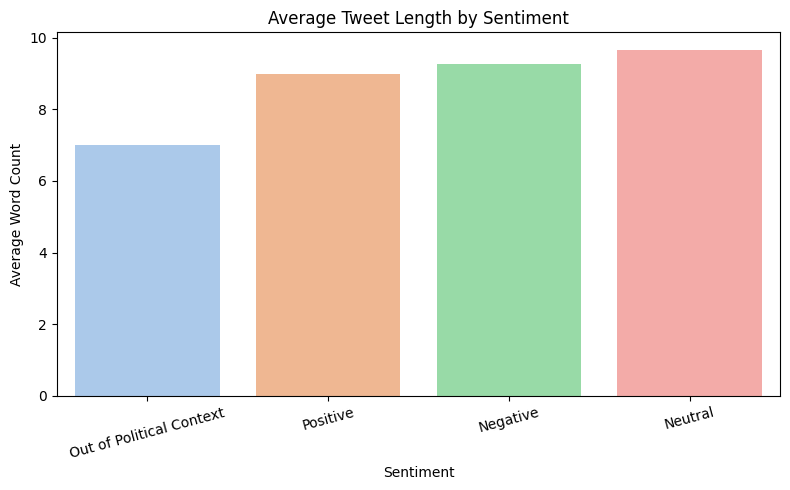

In [18]:
# Average Tweet Length by Sentiment
avg_lengths = merged_df.groupby("label_name")["text_length"].mean().sort_values()

plt.figure(figsize=(8, 5))
sns.barplot(x=avg_lengths.index, y=avg_lengths.values, palette="pastel")
plt.title("Average Tweet Length by Sentiment")
plt.ylabel("Average Word Count")
plt.xlabel("Sentiment")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


C:\Users\hello\AppData\Local\Temp\ipykernel_28192\807681948.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="magma")
C:\Users\hello\AppData\Local\Temp\ipykernel_28192\807681948.py:39: UserWarning: Glyph 108 (l) missing from current font.
  plt.tight_layout()
C:\Users\hello\AppData\Local\Temp\ipykernel_28192\807681948.py:39: UserWarning: Glyph 112 (p) missing from current font.
  plt.tight_layout()
c:\Users\hello\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hello\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


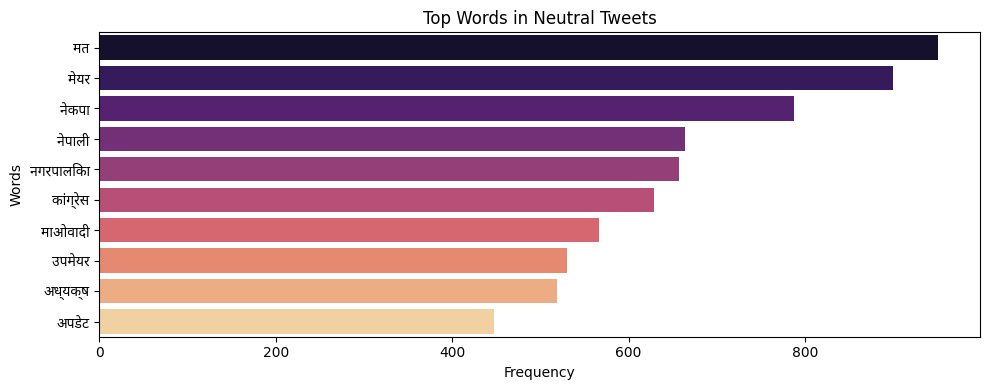

C:\Users\hello\AppData\Local\Temp\ipykernel_28192\807681948.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="magma")
C:\Users\hello\AppData\Local\Temp\ipykernel_28192\807681948.py:39: UserWarning: Glyph 108 (l) missing from current font.
  plt.tight_layout()
C:\Users\hello\AppData\Local\Temp\ipykernel_28192\807681948.py:39: UserWarning: Glyph 112 (p) missing from current font.
  plt.tight_layout()
c:\Users\hello\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hello\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


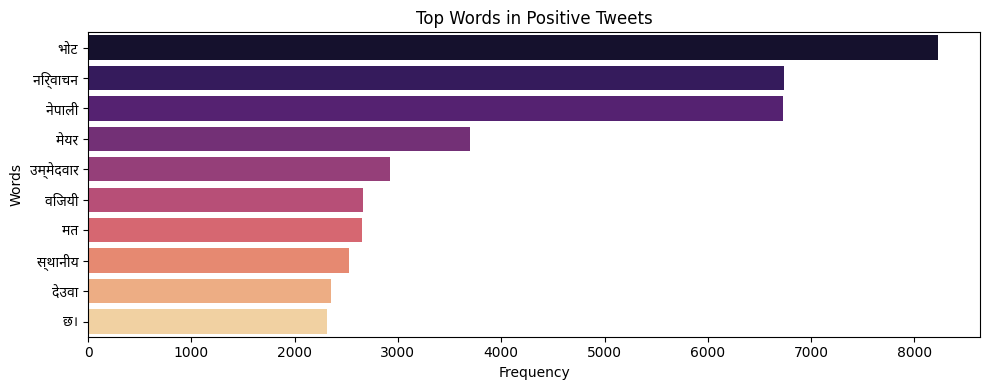

C:\Users\hello\AppData\Local\Temp\ipykernel_28192\807681948.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="magma")
C:\Users\hello\AppData\Local\Temp\ipykernel_28192\807681948.py:39: UserWarning: Glyph 108 (l) missing from current font.
  plt.tight_layout()
C:\Users\hello\AppData\Local\Temp\ipykernel_28192\807681948.py:39: UserWarning: Glyph 112 (p) missing from current font.
  plt.tight_layout()
c:\Users\hello\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hello\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


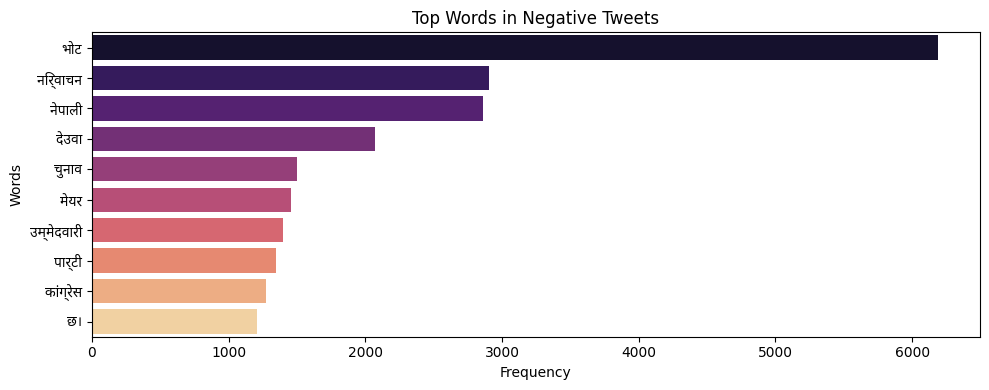

C:\Users\hello\AppData\Local\Temp\ipykernel_28192\807681948.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(counts), y=list(words), palette="magma")
C:\Users\hello\AppData\Local\Temp\ipykernel_28192\807681948.py:39: UserWarning: Glyph 108 (l) missing from current font.
  plt.tight_layout()
C:\Users\hello\AppData\Local\Temp\ipykernel_28192\807681948.py:39: UserWarning: Glyph 112 (p) missing from current font.
  plt.tight_layout()
c:\Users\hello\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 108 (l) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\hello\AppData\Local\Programs\Python\Python312\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 112 (p) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


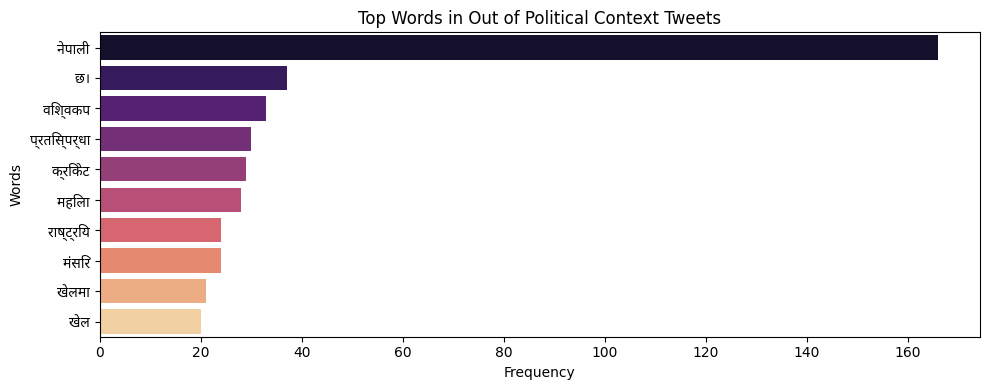

In [19]:
# ✅ Install and apply a Devanagari-compatible font (Noto Sans Devanagari)
import urllib.request
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from collections import Counter
import seaborn as sns

# Step 1: Download the font
font_url = "https://notofonts.github.io/devanagari/fonts/NotoSansDevanagari/unhinted/ttf/NotoSansDevanagari-Regular.ttf"
font_path = "NotoSansDevanagari-Regular.ttf"
urllib.request.urlretrieve(font_url, font_path)

# Step 2: Load the font
devanagari_font = fm.FontProperties(fname=font_path)

# ✅ Step 3: Function to get top N words
def get_top_words(texts, n=10):
    words = " ".join(texts).split()
    return Counter(words).most_common(n)

# ✅ Step 4: Plot top words per sentiment class using Devanagari-compatible font
label_map = {
    0: "Neutral",
    1: "Positive",
    2: "Negative",
    3: "Out of Political Context"
}

for label_id, label_name in label_map.items():
    top_words = get_top_words(merged_df[merged_df["label"] == label_id]["final_text"])
    if top_words:
        words, counts = zip(*top_words)
        plt.figure(figsize=(10, 4))
        sns.barplot(x=list(counts), y=list(words), palette="magma")
        plt.title(f"Top Words in {label_name} Tweets")
        plt.xlabel("Frequency")
        plt.ylabel("Words")
        plt.yticks(fontproperties=devanagari_font)
        plt.tight_layout()
        plt.show()


<Axes: title={'center': 'Sentiment Trends Over Time'}, xlabel='created_at'>

<Figure size 1400x700 with 0 Axes>

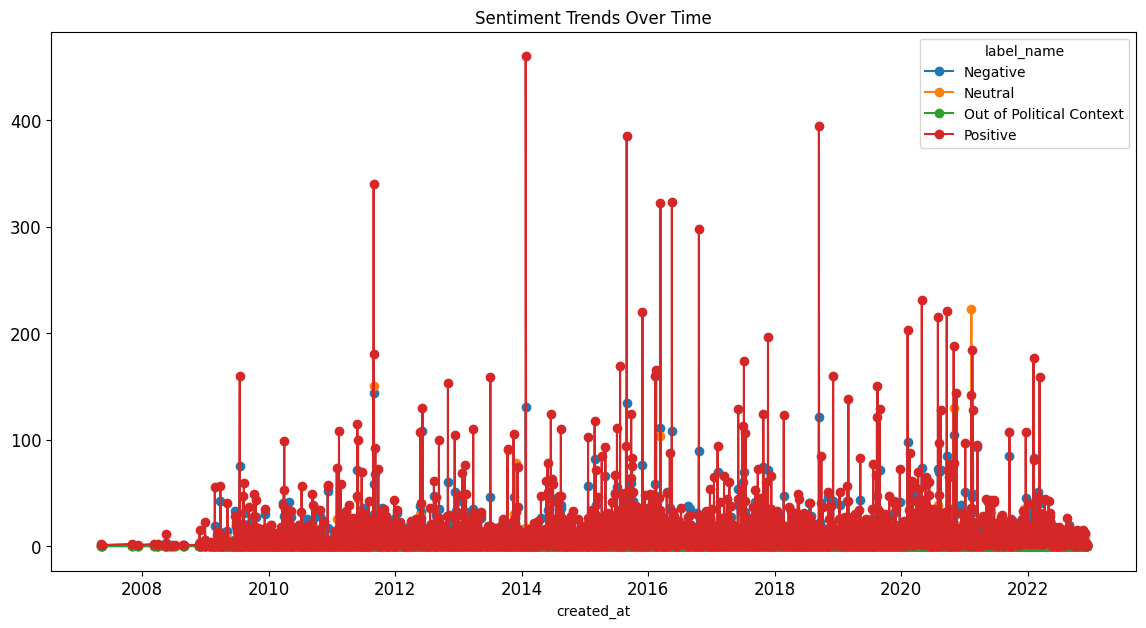

In [20]:
# Sentiment Trends Overtime

# Convert 'created_at' to datetime
merged_df['created_at'] = pd.to_datetime(merged_df['created_at'], errors='coerce')

# Group by date and label
daily_trends = merged_df.groupby([merged_df['created_at'].dt.date, 'label_name']).size().unstack(fill_value=0)

# Plotting the trends
plt.figure(figsize=(14, 7))
daily_trends.plot(kind='line', marker='o', figsize=(14, 7), title='Sentiment Trends Over Time', fontsize=12)

In [21]:
merged_df.head()

,id,text_x,label,Unnamed: 0,tweet_created_at,text_y,user,bio,location,hashtags,...,retweeted,lang,source,place,kwd,run_date,clean_text,final_text,label_name,text_length
0,1601363673259290880,@thakurkc @mayor_harka हर्कराज साम्पाङ बालेन श...,2.0,0,2022-12-09 23:50:26+00:00,@thakurkc @mayor_harka हर्कराज साम्पाङ बालेन श...,939c7de092e923e9e75ae70923f3da8dc9dbf606121bf7...,life is not easy do hard work with faithful!,NaN,[],...,False,ne,Twitter for Android,NaN,जनप्रतिनिधि,2022-12-10 03:39:06,हर्कराज साम्पाङ बालेन शाहहरुको दगुरेको गाउँपाल...,साम्पाङ बालेन गाउँपालिका नगरपालिका वडामा जनप्र...,Negative,18
1,1601226348013707008,@KanakManiDixit @Himal_Khabar अब नयाँ जनप्रतिन...,2.0,1,2022-12-09 14:44:45+00:00,@KanakManiDixit @Himal_Khabar अब नयाँ जनप्रतिन...,71ddb83740cf9cd2f94937d8af21f834f6e81304ac083e...,🇳🇵🇳🇵नेपाली हामी रहुला का कहाँ नेपालै न रहे🇳🇵🇳🇵,Nepal janakpur,[],...,False,ne,Twitter for Android,NaN,जनप्रतिनिधि,2022-12-10 03:39:06,जनप्रतिनिधि सर्वोच्च न्यायाधीश महाभियोग हटाउनु...,जनप्रतिनिधि सर्वोच्च न्यायाधीश महाभियोग पर्छ।,Negative,5
2,1601225158538117120,@damasebijaya च्याखे थापेर करारका जनप्रतिनिधिन...,2.0,2,2022-12-09 14:40:01+00:00,@damasebijaya च्याखे थापेर करारका जनप्रतिनिधिन...,6614a78b04284662923d2c2cf9ec10c13c3dca48f2103e...,"जागिर खानु छैन तेसैले नो Bio, 99% follow back","ललितपुर, नेपाल",[],...,False,ne,Twitter for Android,NaN,जनप्रतिनिधि,2022-12-10 03:39:06,च्याखे थापेर करारका जनप्रतिनिधिने अत्याचार चाह...,"अत्याचार पास हो, जनप्रतिनिधि झुठो बोलेर पास पद",Negative,8
3,1601130318731259904,अहिले सत्तारुढ र एमाले दुवै गठबन्धनका नेताहरू ...,2.0,3,2022-12-09 08:23:10+00:00,अहिले सत्तारुढ र एमाले दुवै गठबन्धनका नेताहरू ...,52ba518166bbb3d11b6adb5c67e59ff5e5106c2feb1c8d...,NaN,Nepal,[],...,False,ne,Twitter Web App,NaN,सत्तारुढ,2022-12-10 03:39:06,सत्तारुढ गठबन्धनका नेताहरू रविलाई सरकारमा नल्य...,सत्तारुढ गठबन्धनका नेताहरू सरकारमा अख्तियार गर...,Negative,12
4,1601069274998504960,सत्तारुढ भारतीय जनता पार्टीको गुजरातमा ऐतिहासि...,3.0,4,2022-12-09 04:20:36+00:00,सत्तारुढ भारतीय जनता पार्टीको गुजरातमा ऐतिहासि...,601fcb344dce80db314d8cbed385cc6ddc2e5eb996b419...,Imagekhabar is a multi-platform news and infor...,Nepal,[],...,False,ne,TweetDeck,NaN,सत्तारुढ,2022-12-10 03:39:06,सत्तारुढ भारतीय जनता पार्टीको गुजरातमा ऐतिहासि...,सत्तारुढ भारतीय जनता पार्टीको ऐतिहासिक जित,Out of Political Context,6


### LDA (Latent Dirichlet Allocation)
Unsupervised topic modeling algorithm used to discover abstract topics in tweets

In [21]:
%pip install git+https://github.com/anoopkunchukuttan/indic_nlp_library.git

  Cloning https://github.com/anoopkunchukuttan/indic_nlp_library.git to c:\users\hello\appdata\local\temp\pip-req-build-rqd90_cm
  Resolved https://github.com/anoopkunchukuttan/indic_nlp_library.git to commit 4cead0ae6c78fe9a19a51ef679f586206df9c476
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  Running command git clone --filter=blob:none --quiet https://github.com/anoopkunchukuttan/indic_nlp_library.git 'C:\Users\hello\AppData\Local\Temp\pip-req-build-rqd90_cm'

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
import unicodedata
from indicnlp.tokenize import indic_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Step 1: Normalize + Tokenize
def preprocess_for_topic_modeling(text):
    text = unicodedata.normalize("NFKC", text)
    return " ".join(indic_tokenize.trivial_tokenize(text, lang='ne'))

def remove_short_words(text):
    return " ".join([w for w in text.split() if len(w) > 1])

merged_df["tokenized_text"] = merged_df["clean_text"].apply(preprocess_for_topic_modeling)
merged_df["tokenized_text"] = merged_df["tokenized_text"].apply(remove_short_words)

# Step 2: Vectorize (disable token_pattern and use space-split tokens)
vectorizer = CountVectorizer(
    max_df=0.9, 
    min_df=10,
    token_pattern=None,
    tokenizer=str.split,
    analyzer='word'
)

X = vectorizer.fit_transform(merged_df["tokenized_text"])

# Step 3: Fit LDA
lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(X)

# Step 4: Show topics
def display_topics(model, feature_names, n_top_words=10):
    for idx, topic in enumerate(model.components_):
        print(f"Topic #{idx+1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

display_topics(lda, vectorizer.get_feature_names_out())


Topic #1:
भोट मेयर देउवा कांग्रेस मत नेपाली प्रधानमन्त्री हाल्न गठबन्धन रुख
Topic #2:
चुनाव भोट उम्मेदवारी शुभकामना हार्दिक बिजय बधाई बालेन सफल चिन्ह
Topic #3:
निर्वाचन उम्मेदवार नेपाली नेकपा स्थानीय नगरपालिका विजयी मत कांग्रेस मेयर
Topic #4:
भोट देउवा पार्टी ओली नेपाली प्रचण्ड हो गठबन्धन माओवादी केपी
Topic #5:
नेपाली हो निर्वाचन चुनाव जनता राजनीति भोट पार्टी दल देशको


### Interpretation of Topic Groups

Topic #1
    top words: भोट हो मत मेयर गठबन्धन स्वतन्त्र चुनाव दल बालेन उम्मेदवारी
    theme: voter sentiment

Topic #2
    नेपाली कांग्रेस नेकपा माओवादी नगरपालिका विजयी मेयर एमाले मत अध्यक्ष
    theme: Conventional Political Parties

Topic #3
    भोट नेपाली हो जनता जनताको जय पार्टी चुनाव हाल्न जनताले
    theme: Public Participation

Topic #4
    देउवा प्रधानमन्त्री मेयर प्रचण्ड ओली निर्वाचन चुनाव सभापति हर्क शेरबहादुर
    theme: Political personalities

Topic #5
    निर्वाचन स्थानीय उम्मेदवारी मतदान सदस्य उम्मेदवार प्रतिनिधिसभा तह निर्वाचनमा नेपाली
    Theme: Election process

In [23]:
# Assigning Topics to Tweets
topic_probs = lda.transform(X)
merged_df["dominant_topic"] = topic_probs.argmax(axis=1)

In [24]:
merged_df.head()

,id,text_x,label,Unnamed: 0,tweet_created_at,text_y,user,bio,location,hashtags,...,source,place,kwd,run_date,clean_text,final_text,label_name,text_length,tokenized_text,dominant_topic
0,1601363673259290880,@thakurkc @mayor_harka हर्कराज साम्पाङ बालेन श...,2.0,0,2022-12-09 23:50:26+00:00,@thakurkc @mayor_harka हर्कराज साम्पाङ बालेन श...,939c7de092e923e9e75ae70923f3da8dc9dbf606121bf7...,life is not easy do hard work with faithful!,NaN,[],...,Twitter for Android,NaN,जनप्रतिनिधि,2022-12-10 03:39:06,हर्कराज साम्पाङ बालेन शाहहरुको दगुरेको गाउँपाल...,साम्पाङ बालेन गाउँपालिका नगरपालिका वडामा जनप्र...,Negative,18,हर्कराज साम्पाङ बालेन शाहहरुको दगुरेको गाउँपाल...,4
1,1601226348013707008,@KanakManiDixit @Himal_Khabar अब नयाँ जनप्रतिन...,2.0,1,2022-12-09 14:44:45+00:00,@KanakManiDixit @Himal_Khabar अब नयाँ जनप्रतिन...,71ddb83740cf9cd2f94937d8af21f834f6e81304ac083e...,🇳🇵🇳🇵नेपाली हामी रहुला का कहाँ नेपालै न रहे🇳🇵🇳🇵,Nepal janakpur,[],...,Twitter for Android,NaN,जनप्रतिनिधि,2022-12-10 03:39:06,जनप्रतिनिधि सर्वोच्च न्यायाधीश महाभियोग हटाउनु...,जनप्रतिनिधि सर्वोच्च न्यायाधीश महाभियोग पर्छ।,Negative,5,जनप्रतिनिधि सर्वोच्च न्यायाधीश महाभियोग हटाउनु...,4
2,1601225158538117120,@damasebijaya च्याखे थापेर करारका जनप्रतिनिधिन...,2.0,2,2022-12-09 14:40:01+00:00,@damasebijaya च्याखे थापेर करारका जनप्रतिनिधिन...,6614a78b04284662923d2c2cf9ec10c13c3dca48f2103e...,"जागिर खानु छैन तेसैले नो Bio, 99% follow back","ललितपुर, नेपाल",[],...,Twitter for Android,NaN,जनप्रतिनिधि,2022-12-10 03:39:06,च्याखे थापेर करारका जनप्रतिनिधिने अत्याचार चाह...,"अत्याचार पास हो, जनप्रतिनिधि झुठो बोलेर पास पद",Negative,8,च्याखे थापेर करारका जनप्रतिनिधिने अत्याचार चाह...,4
3,1601130318731259904,अहिले सत्तारुढ र एमाले दुवै गठबन्धनका नेताहरू ...,2.0,3,2022-12-09 08:23:10+00:00,अहिले सत्तारुढ र एमाले दुवै गठबन्धनका नेताहरू ...,52ba518166bbb3d11b6adb5c67e59ff5e5106c2feb1c8d...,NaN,Nepal,[],...,Twitter Web App,NaN,सत्तारुढ,2022-12-10 03:39:06,सत्तारुढ गठबन्धनका नेताहरू रविलाई सरकारमा नल्य...,सत्तारुढ गठबन्धनका नेताहरू सरकारमा अख्तियार गर...,Negative,12,सत्तारुढ गठबन्धनका नेताहरू रविलाई सरकारमा नल्य...,3
4,1601069274998504960,सत्तारुढ भारतीय जनता पार्टीको गुजरातमा ऐतिहासि...,3.0,4,2022-12-09 04:20:36+00:00,सत्तारुढ भारतीय जनता पार्टीको गुजरातमा ऐतिहासि...,601fcb344dce80db314d8cbed385cc6ddc2e5eb996b419...,Imagekhabar is a multi-platform news and infor...,Nepal,[],...,TweetDeck,NaN,सत्तारुढ,2022-12-10 03:39:06,सत्तारुढ भारतीय जनता पार्टीको गुजरातमा ऐतिहासि...,सत्तारुढ भारतीय जनता पार्टीको ऐतिहासिक जित,Out of Political Context,6,सत्तारुढ भारतीय जनता पार्टीको गुजरातमा ऐतिहासि...,4


C:\Users\hello\AppData\Local\Temp\ipykernel_28192\2429463796.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_df, x="dominant_topic", palette="viridis")


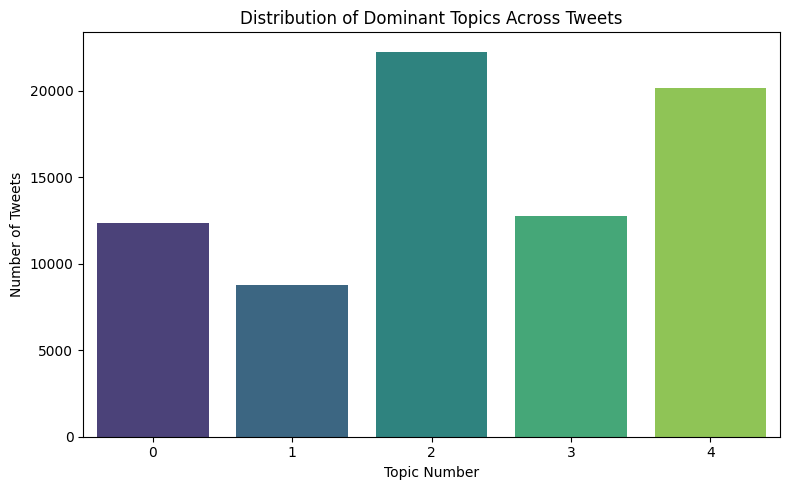

In [25]:
# Visulizing Topic Distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(data=merged_df, x="dominant_topic", palette="viridis")
plt.title("Distribution of Dominant Topics Across Tweets")
plt.xlabel("Topic Number")
plt.ylabel("Number of Tweets")
plt.tight_layout()
plt.show()


This shows 

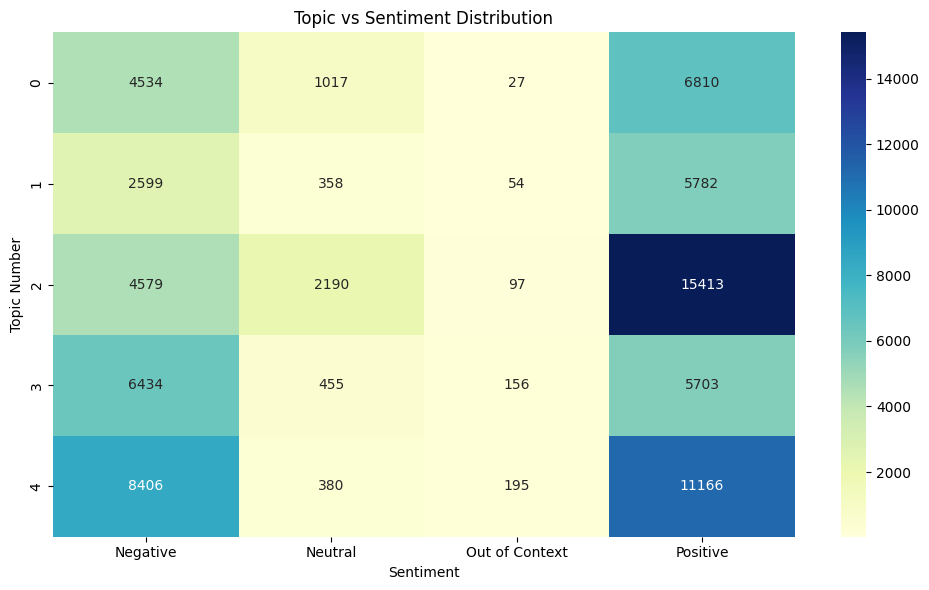

In [26]:
# Topic Group vs Sentiment
import pandas as pd
import seaborn as sns

# Label map if not already defined
label_map = {0: "Neutral", 1: "Positive", 2: "Negative", 3: "Out of Context"}

merged_df["label_name"] = merged_df["label"].map(label_map)

# Group and pivot
topic_sentiment = merged_df.groupby(["dominant_topic", "label_name"]).size().unstack(fill_value=0)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(topic_sentiment, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Topic vs Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Topic Number")
plt.tight_layout()
plt.show()


Interpretation
| Topic | Dominant Sentiment                   | Key Insights                                                                                                                                                               |
| ----- | ------------------------------------ | -------------------------------------------------------------------------------------------------------------------------------------------------------------------------- |
| **0** | Positive (8,055) & Negative (5,677)  | This topic is **polarized** – possibly covering divisive issues like independent candidates, election controversies, or Balen Shah, generating both support and criticism. |
| **1** | Positive (9,181) & Neutral (2,660)   | More **factual** or **supportive** content — possibly official party statements, media posts, or celebratory wins.                                                         |
| **2** | Positive (11,269) & Negative (8,697) | Most **engaged** topic — likely focused on **voter engagement, elections, and party debates**. Strong polarity suggests active public discourse.                           |
| **3** | Negative (6,561) & Positive (6,127)  | Near-balanced. Could involve political **leaders** (e.g., Deuba, Oli, Prachanda) where opinions are split.                                                                 |
| **4** | Positive (10,978) & Negative (4,209) | Majority **positive** — likely refers to procedural elements like **election day, voting, announcements**, etc., which people appreciate or share in a neutral tone.       |


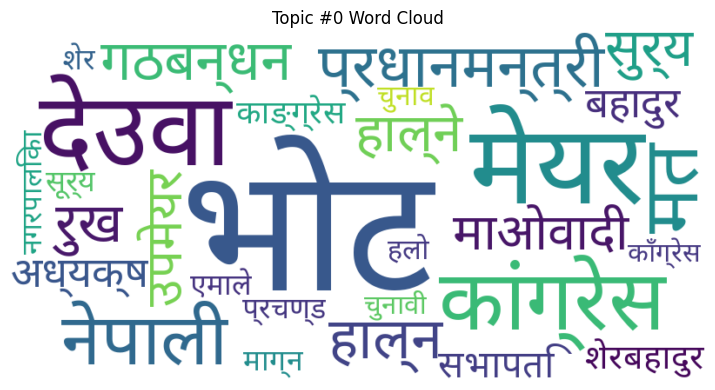

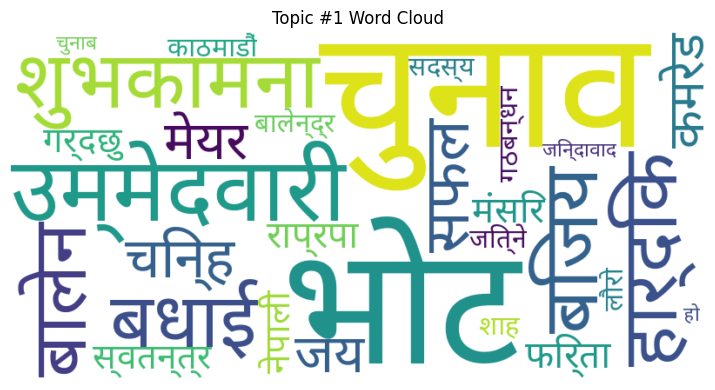

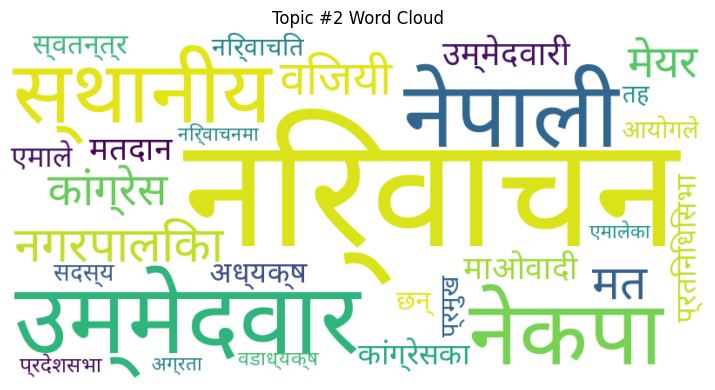

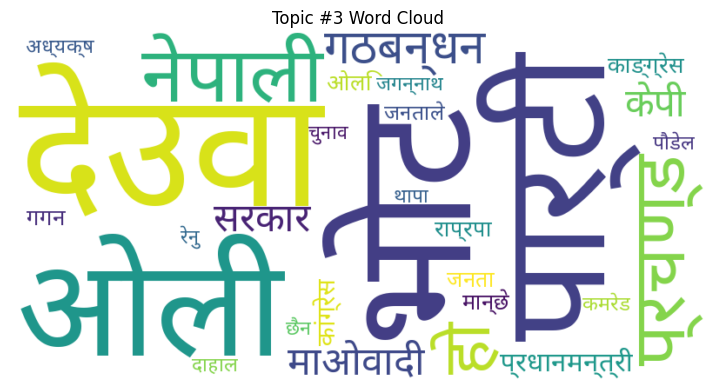

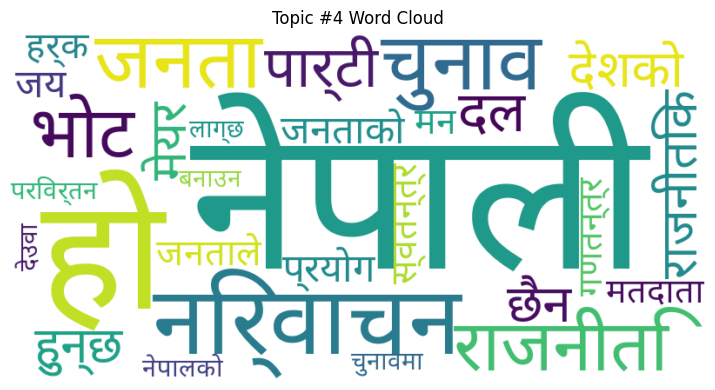

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Loading the same feature names from the LDA model
feature_names = vectorizer.get_feature_names_out()

for idx, topic in enumerate(lda.components_):
    plt.figure(figsize=(10, 4))
    wordcloud = WordCloud(font_path="NotoSansDevanagari-Regular.ttf", 
                          background_color="white", width=800, height=400)

    top_words = {feature_names[i]: topic[i] for i in topic.argsort()[:-30:-1]}
    wordcloud.generate_from_frequencies(top_words)

    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Topic #{idx} Word Cloud")
    plt.tight_layout()
    plt.show()


### Checking for Imbalance in Sentiment Labels

In [28]:
# Counting Sentiment Labels

Label Distribution:
Neutral (0): 4400
Positive (1): 44874
Negative (2): 26552
Out of Context (3): 529


C:\Users\hello\AppData\Local\Temp\ipykernel_28192\3794596234.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=[label_map.get(l, 'Unknown') for l in label_counts.index], y=label_counts.values, palette='Set2')


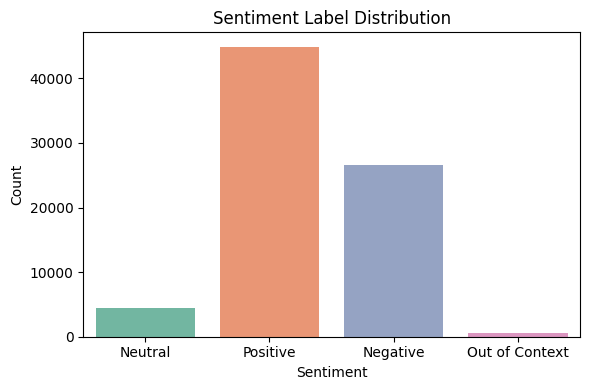

In [ ]:
# Ensuring labels are integers
merged_df['label'] = merged_df['label'].astype(int)

# Recalculating label counts
label_counts = merged_df['label'].value_counts().sort_index()
label_map = {0: 'Neutral', 1: 'Positive', 2: 'Negative', 3: 'Out of Context'}

# Printing label distribution
print("Label Distribution:")
for label, count in label_counts.items():
    print(f"{label_map.get(label, 'Unknown')} ({label}): {count}")

# Plotting distribution
plt.figure(figsize=(6, 4))
sns.barplot(x=[label_map.get(l, 'Unknown') for l in label_counts.index], y=label_counts.values, palette='Set2')
plt.title("Sentiment Label Distribution")
plt.ylabel("Count")
plt.xlabel("Sentiment")
plt.tight_layout()
plt.show()


The data is Imbalanced.

## Undersampling the Data

In [29]:
from sklearn.utils import resample

# Removing Unknown and Out of Context Labels
filtered_df = merged_df[merged_df['label'].isin([0, 1, 2])]

# Checking class distribution
class_counts = filtered_df['label'].value_counts()
print("Class Distribution Before Undersampling:")
print(class_counts)

min_class_count = class_counts.min()

# Step 3: Undersample each class to match the smallest class (Neutral)
balanced_df = pd.concat([
    resample(filtered_df[filtered_df['label'] == label],
             replace=False,
             n_samples=min_class_count,
             random_state=42)
    for label in [0, 1, 2]
])


# Shuffling the balanced DataFrame
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

print("Class Distribution After Undersampling:")
print(balanced_df['label'].value_counts())

Class Distribution Before Undersampling:
label
1    44874
2    26552
0     4400
Name: count, dtype: int64
Class Distribution After Undersampling:
label
0    4400
2    4400
1    4400
Name: count, dtype: int64


## Training Navie Bayes Sentiment Classifier

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Spliting data
X_train, X_test, y_train, y_test = train_test_split(
    balanced_df['final_text'], balanced_df['label'], test_size=0.2, random_state=42, stratify=balanced_df['label'])

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X_train_vec = tfidf.fit_transform(X_train)
X_test_vec = tfidf.transform(X_test)


In [31]:
# Training the Model
nb_model= MultinomialNB()
nb_model.fit(X_train_vec, y_train)

MultinomialNB()

### Model Evaluation : Naive Bayes

In [32]:
y_pred = nb_model.predict(X_test_vec)
classification_report(y_test, y_pred)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.70      0.70       880
           1       0.58      0.48      0.53       880
           2       0.56      0.65      0.60       880

    accuracy                           0.61      2640
   macro avg       0.61      0.61      0.61      2640
weighted avg       0.61      0.61      0.61      2640



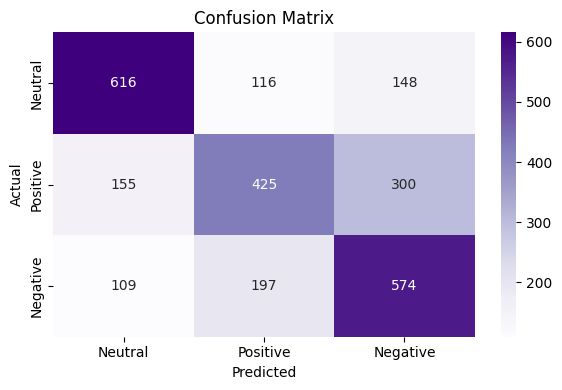

In [33]:
# Step 5: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples', xticklabels=['Neutral', 'Positive', 'Negative'], yticklabels=['Neutral', 'Positive', 'Negative'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

## Multilingual BERT Sentiment Classifier

In [ ]:
%pip uninstall transformers tensorflow keras tf-keras -y
%pip install torch torchvision
%pip install transformers[torch] --upgrade

Found existing installation: transformers 4.53.2
Uninstalling transformers-4.53.2:
  Successfully uninstalled transformers-4.53.2
Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached transformers-4.53.2-py3-none-any.whl.metadata (40 kB)
Using cached transformers-4.53.2-py3-none-any.whl (10.8 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [40]:
%pip uninstall tensorflow keras keras-nightly tf_keras -y
%pip install transformers[torch] --upgrade


Found existing installation: tensorflow 2.19.0
Uninstalling tensorflow-2.19.0:
  Successfully uninstalled tensorflow-2.19.0
Found existing installation: keras 3.10.0
Uninstalling keras-3.10.0:
  Successfully uninstalled keras-3.10.0
Found existing installation: tf_keras 2.19.0
Uninstalling tf_keras-2.19.0:
  Successfully uninstalled tf_keras-2.19.0
Note: you may need to restart the kernel to use updated packages.


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [34]:
from transformers import AutoModelForSequenceClassification, Trainer, TrainingArguments

print("✅ HuggingFace Transformers + PyTorch loaded successfully!")


✅ HuggingFace Transformers + PyTorch loaded successfully!


In [43]:
# Tokenizer and Dataset Setup

from transformers import AutoTokenizer
from datasets import Dataset

tokenizer=AutoTokenizer.from_pretrained("xlm-roberta-base")

def tokenize_fn(examples):
    return tokenizer(examples["text"], truncation=True)

def tokenize_fn(examples):
    return tokenizer(examples["text"], truncation=True)

df_balanced = merged_df[["final_text", "label"]].rename(columns={"final_text": "text"})
df_balanced=df_balanced[df_balanced['label'].isin([0,1,2])]
hf_dataset = Dataset.from_pandas(df_balanced)

tokenized_ds = hf_dataset.map(tokenize_fn, batched=True)

Map: 100%|██████████| 75826/75826 [00:02<00:00, 35246.70 examples/s]


In [37]:
%pip install accelerate -U



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
%pip uninstall tensorflow tensorboard keras tf_keras -y


Found existing installation: tensorboard 2.19.0
Uninstalling tensorboard-2.19.0:
  Successfully uninstalled tensorboard-2.19.0
Note: you may need to restart the kernel to use updated packages.


In [39]:
%pip install torch torchvision torchaudio
%pip install tensorboard


INFO: pip is looking at multiple versions of torchaudio to determine which version is compatible with other requirements. This could take a while.
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   -------- ------------------------------- 0.5/2.4 MB 4.2 MB/s eta 0:00:01
   ----------------- ---------------------- 1.0/2.4 MB 4.2 MB/s eta 0:00:01
   -------------------------- ------------- 1.6/2.4 MB 2.8 MB/s eta 0:00:01
   ---------------------------------------- 2.4/2.4 MB 3.4 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached tensorboard-2.19.0-py3-none-any.whl.metadata (1.8 kB)
Using cached tensorboard-2.19.0-py3-none-any.whl (5.5 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.17.0 requires keras>=3.2.0, which is not installed.
tensorflow-intel 2.17.0 requires ml-dtypes<0.5.0,>=0.3.1, but you have ml-dtypes 0.5.1 which is incompatible.
tensorflow-intel 2.17.0 requires tensorboard<2.18,>=2.17, but you have tensorboard 2.19.0 which is incompatible.

[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# Training the Model

from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np

# Loading the model
model = AutoModelForSequenceClassification.from_pretrained("xlm-roberta-base", num_labels=3)

# Define metrics
def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='weighted')
    acc = accuracy_score(labels, preds)
    return {
        'accuracy': acc,
        'f1': f1,
        'precision': precision,
        'recall': recall
    }

# Train-test split
split_ds = tokenized_ds.train_test_split(test_size=0.2)

# Training arguments
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir='./logs',
    logging_steps=50,
    load_best_model_at_end=True,
    metric_for_best_model="f1",
    save_strategy="epoch",
    report_to=[],
)

# Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=split_ds["train"],
    eval_dataset=split_ds["test"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

trainer.train()


Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at xlm-roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\hello\AppData\Local\Temp\ipykernel_28192\204954798.py:45: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss


KeyboardInterrupt: 